# NumPy的使用

## NumPy的功能

* ndarray数组
* 向量计算的函数
* 文件读写工具
* 和其他语言接口
* 线性代数、傅里叶变换等

## ndarray数组

In [25]:
import numpy as np

In [26]:
# 生成一些随机数
data = np.random.randn(2,3)
data

array([[ 1.75402122e-01,  1.47857805e+00,  1.04424756e+00],
       [-5.22715135e-01,  1.34033701e-03, -7.41835327e-01]])

In [4]:
data.dtype

dtype('float64')

ndarray数组是一个同构数据的容器，每一个数组都有一个**shape**数组的维度及各维度的尺寸及一个**dtype**数据类型

> 笔记：当你在本书中看到“数组”、“NumPy数组”、"ndarray"时，基本上都指的是同一样东西，即ndarray对象。

#### 创建ndarray数组

In [5]:
data_nd = [2,3,4,5,8]
data_np = np.array(data_nd)
data_np

array([2, 3, 4, 5, 8])

In [6]:
data_np.shape

(5,)

In [7]:
data_nd2 = [[2,3,4],[7,8,9]]
data_np2 = np.array(data_nd2)
data_np2

array([[2, 3, 4],
       [7, 8, 9]])

In [9]:
data_np2.shape

(2, 3)

In [10]:
data_np2.ndim

2

In [11]:
np.zeros(12)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [13]:
np.ones(3)

array([ 1.,  1.,  1.])

In [14]:
np.empty(5)

array([ 0.,  0.,  0.,  0.,  0.])

> **注意：认为np.empty会返回全0数组的想法是不安全的。很多情况下（如前所示），它返回的都是一些未初始化的垃圾值。**

##### arange是python里函数range的np版

In [15]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

####  ndarray构造函数

![](.\imgs\7178691-78ab11f67e7077a6.png)

#### 数据类型dtype和数据类型转换astype

In [17]:
data_np.dtype

dtype('int32')

In [16]:
data_np.astype('float32')

array([ 2.,  3.,  4.,  5.,  8.], dtype=float32)

In [19]:
In [44]: numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [45]: numeric_strings.astype(float)



array([  1.25,  -9.6 ,  42.  ])

> 笔记：**调用astype总会创建一个新的数组（一个数据的备份），即使新的dtype与旧的dtype相同。**

### 数组运算

数组很重要，因为它使你不用编写循环即可对数据执行批量运算。NumPy用户称其为矢量化（vectorization）。大小相等的数组之间的任何算术运算都会将运算应用到元素级：

In [20]:
arr = np.array([[2,3,4],[4,5,6]])
arr * arr

array([[ 4,  9, 16],
       [16, 25, 36]])

In [22]:
arr.dot(np.transpose(arr))

array([[29, 47],
       [47, 77]])

In [23]:
1/arr

array([[ 0.5       ,  0.33333333,  0.25      ],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [24]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr > arr2

array([[ True, False,  True],
       [False,  True, False]], dtype=bool)

### 数组索引

* 一维数组

In [25]:
arr2 = np.arange(10)
arr2[5:8] = 30

In [26]:
arr2

array([ 0,  1,  2,  3,  4, 30, 30, 30,  8,  9])

In [27]:
arr_copy = arr2[2:7]
arr_copy[0] = 1234
arr2

array([   0,    1, 1234,    3,    4,   30,   30,   30,    8,    9])

> 注意：如果你想要得到的是ndarray切片的一份副本而非视图，就需要明确地进行复制操作，例如arr[5:8].copy()。

* 多维数组

以下两种方法是等价的

In [29]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2,2]

9

In [31]:
arr2d[1][2]

6

在多维数组中，如果省略了后面的索引，则返回对象会是一个维度低一点的ndarray（它含有高一级维度上的所有数据）。因此，在2×2×3数组arr3d中：

In [35]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d[1,1]

array([10, 11, 12])

#### 切片索引

按照轴由低向高方向

In [37]:
arr3d[1:]

array([[[ 7,  8,  9],
        [10, 11, 12]]])

In [38]:
arr2d[1:]

array([[4, 5, 6],
       [7, 8, 9]])

In [39]:
arr2d[1:,:2]

array([[4, 5],
       [7, 8]])

** 切片的图示 **

![](./imgs/4_1.png)

#### 布尔索引

In [41]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

data = np.random.randn(7, 4)

names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], 
      dtype='<U4')

In [46]:
data[names=='Bob']

array([[ 0.93260638, -1.39928085,  0.96558143, -0.25288964],
       [ 1.10178872, -0.51680493,  0.07568085, -0.41097222]])

In [49]:
data[names == 'Bob',2]

array([ 0.96558143,  0.07568085])

In [50]:
data[names!= 'Bob']

array([[ 1.37347713, -0.12475641,  0.05272357, -0.34826148],
       [-0.74067646, -0.48024801,  2.46975559, -0.71204289],
       [ 0.10882562,  1.04277903,  1.9297563 , -1.52840623],
       [ 0.26635679,  2.27397001,  1.03262979, -0.64711082],
       [ 0.63593602,  0.33923755,  0.59208953, -2.21462094]])

In [51]:
data[~(names == 'Bob')]

array([[ 1.37347713, -0.12475641,  0.05272357, -0.34826148],
       [-0.74067646, -0.48024801,  2.46975559, -0.71204289],
       [ 0.10882562,  1.04277903,  1.9297563 , -1.52840623],
       [ 0.26635679,  2.27397001,  1.03262979, -0.64711082],
       [ 0.63593602,  0.33923755,  0.59208953, -2.21462094]])

通过布尔运算符

In [52]:
mask = (names == 'Bob') | (names == 'Will')
data[mask]

array([[ 0.93260638, -1.39928085,  0.96558143, -0.25288964],
       [-0.74067646, -0.48024801,  2.46975559, -0.71204289],
       [ 1.10178872, -0.51680493,  0.07568085, -0.41097222],
       [ 0.10882562,  1.04277903,  1.9297563 , -1.52840623]])

> 通过布尔型索引选取数组中的数据，将总是创建数据的副本，即使返回一模一样的数组也是如此。
>> 注意：Python关键字and和or在布尔型数组中无效。要使用&与|。

#### 花式索引

花式索引（Fancy indexing）是一个NumPy术语，它指的是利用整数数组进行索引

In [56]:
arr3 = np.empty((8,3))

In [60]:
for i in range(8):
    arr3[i] = i

In [61]:
arr3[[2,4,1]]

array([[ 2.,  2.,  2.],
       [ 4.,  4.,  4.],
       [ 1.,  1.,  1.]])

In [62]:
arr4 = np.arange(32).reshape(8,4)

In [64]:
arr4[[0,3,5],[0,2,3]]

array([ 0, 14, 23])

In [65]:
arr4[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

> 花式索引是复制，这和切片是不同的

### 数组转置和轴对称

In [66]:
arr = np.arange(15).reshape((3, 5))


In [67]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [68]:
arr5 = np.arange(16).reshape(2,2,4)
arr5

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [69]:
arr5.transpose(1,0,2)

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

## 通用函数

* 一元函数
* 二元函数

一元简单

二元

In [ ]:
x = np.random.randn(8)
y = np.random.randn(8)

In [72]:
x

array([-0.89893202, -2.03907138, -0.72933265,  0.86592977,  1.31207727,
       -1.68805094, -1.25556212, -1.32324609])

In [73]:
y

array([-0.48898733, -0.98759085, -1.11812961,  2.51836863, -1.10636839,
        1.78286139, -0.75664537, -0.51185498])

In [71]:
np.minimum(x,y)

array([-0.89893202, -2.03907138, -1.11812961,  0.86592977, -1.10636839,
       -1.68805094, -1.25556212, -1.32324609])

结果可能返回多个数组，虽然并不多见

In [79]:
arr6 =  np.random.randn(7) * 5
arr6

array([  2.88029465,   2.59425316,   1.18738281, -10.47804631,
        -4.60999269,   2.06274443,   3.28342703])

In [82]:
whole_part = np.fmod(arr6,2)

In [83]:
whole_part

array([ 0.88029465,  0.59425316,  1.18738281, -0.47804631, -0.60999269,
        0.06274443,  1.28342703])

In [84]:
r,w = np.modf(arr6)

In [85]:
r

array([ 0.88029465,  0.59425316,  0.18738281, -0.47804631, -0.60999269,
        0.06274443,  0.28342703])

In [86]:
w

array([  2.,   2.,   1., -10.,  -4.,   2.,   3.])

## 利用数组进行数据处理

> NumPy数组使你可以将许多种数据处理任务表述为简洁的数组表达式（否则需要编写循环）。用数组表达式代替循环的做法，通常被称为矢量化。一般来说，矢量化数组运算要比等价的纯Python方式快上一两个数量级（甚至更多），尤其是各种数值计算。在后面内容中（见附录A）我将介绍广播，这是一种针对矢量化计算的强大手段。



In [88]:
x = np.arange(-5,5,0.01)

In [89]:
xs,ys = np.meshgrid(x,x)

In [90]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ..., 
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [93]:
d = np.sqrt(xs ** 2+ys ** 2)

In [94]:
d

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

In [98]:
import matplotlib.pyplot as plt
plt.imshow(d, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

### 将条件逻辑表述为数组运算

In [99]:
In [165]: xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [166]: yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [167]: cond = np.array([True, False, True, True, False])



In [101]:
for x,y,c in zip(xarr,yarr,cond):
    if c:
        print(x)
    else:
        print(y)

1.1
2.2
1.3
1.4
2.5


In [102]:
[x if c else y for x,y,c in zip(xarr,yarr,cond)]

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

**利用np中的where**

In [103]:
np.where(cond,xarr,yarr)

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [3]:
warr = np.arange(12).reshape(3,4)
np.where(warr < 8,warr,0)

array([[0, 1, 2, 3],
       [4, 5, 6, 7],
       [0, 0, 0, 0]])

## 统计

In [4]:
arr8 = np.random.randn(5,4)

In [5]:
arr8.mean()

0.14055952617244288

In [6]:
arr8.std()

1.1255696700895512

可以有一个轴参数axis
> 0是以行为变量计算，1是以列为变量计算，以此类推

In [7]:
arr8.mean(axis = 1)

array([-0.25470665,  0.53307026, -0.03646316,  0.27171928,  0.1891779 ])

统计方法有mean、std、var、sum、prod、cosum、coprod、max、min、argmin、argmax

### 用于布尔型数组的方法
> any、all函数及以下技巧

In [8]:
arr = np.random.randn(100)
(arr>0).sum()

51

### 排序
> 可以方便的计算分位值

In [11]:
largearr = np.random.randn(1000)
largearr.sort()
largearr[int(0.05 * len(largearr))]

-1.6784509062475117

### 唯一化以及其它的集合逻辑

In [12]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe']) # sorted(set(names))
np.unique(names)

array(['Bob', 'Joe', 'Will'], 
      dtype='<U4')

In [14]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values,[3,5])

array([False, False, False,  True, False,  True, False], dtype=bool)

![](./imgs/4_2.png)

## 用于数组的文件输入输出
>np.load,np.save

## 线性代数

## 随机值
> random模块randn、randint、normal、seed、shuffle

In [17]:
r = [x for x in range(12)]
np.random.shuffle(r)

In [18]:
r

[7, 5, 9, 11, 3, 10, 1, 6, 0, 4, 8, 2]

## 随机漫步

In [1]:
# python
import random
position = 0
walks = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walks.append(position)

In [4]:
import matplotlib.pyplot as plt

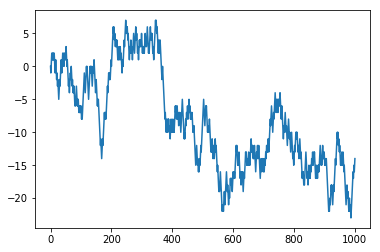

In [5]:
plt.plot(walks)

In [6]:
# numpy
import numpy as np

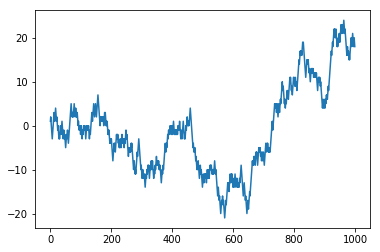

In [7]:
nsteps = 1000
draw = np.random.randint(0,2,size = nsteps)
step = np.where(draw < 1,-1,1)
walk = np.cumsum(step)
plt.plot(walk)

In [8]:
walk.min()

-21

In [9]:
walk.max()

24

In [12]:
(np.abs(walk) >= 10).argmax()

273

In [18]:
nwalks = 1000
nsteps = 1000
draws = np.random.randint(0,2,size=(nwalks,nsteps))
steps_np = np.where(draws < 1,-1,1)
walks_np = np.cumsum(steps_np,axis = 1)

In [20]:
walks_np.max()

104

In [21]:
walks_np.shape

(1000, 1000)

In [22]:
hits30 = (np.abs(walks_np) >= 30).any(1)
hits30.sum()

689

In [24]:
#然后我们利用这个布尔型数组选出那些穿越了30（绝对值）的随机漫步（行），并调用argmax在轴1上获取穿越时间：
cross_times = (np.abs(walks_np[hits30]) >=30).argmax(1)
cross_times.mean()

493.99274310595064